## 多分类问题简单回顾

在二分类问题中，我们可以使用sigmoid函数。而在多分类问题中，我们希望将输入数据划分到超过两个类别中的一个。这种情况下，我们通常使用一种叫做 "softmax" 的函数。

我们将神经网络的最后一层称为 "softmax层"。这一层的输出是一个概率分布，表示输入数据属于每个类别的概率。为了计算这些概率，我们使用 softmax 函数。

让我们假设有 K 个类别，其中第 k 个类别的概率为 $p_k$。我们将最后一层的输出（即 logits）记为 $z_1，z_2，…，z_k$。那么根据 softmax 函数的定义，每个类别的概率可以计算为：

$$ p_k = \frac{exp(z_k)}{\sum_{i=1}^{k} exp(z_i)} $$

这个过程是对所有 K 个 logits 应用指数函数，然后将它们归一化为概率分布。

在训练神经网络时，我们通常使用交叉熵损失函数来度量预测值与真实值之间的差距。对于多分类问题，交叉熵损失函数可以计算为：

$$ L = - \sum_{i=1}^{k} y_i \times log(p_i) $$

其中 $y_i$ 是真实值，$p_i$ 是预测值。

通过最小化交叉熵损失函数，我们可以训练出模型的参数。当我们训练完神经网络后，我们就可以使用它来进行多分类。为了做出预测，我们需要将输入数据输入到神经网络中，并根据输出的概率分布来决定它属于哪个类别。

使用 softmax 函数和交叉熵损失函数是一种多分类的常见的方法。

## 代码实现

### 加载MNIST数据集

In [1]:
import torch
import torchvision

In [2]:
transformation = torchvision.transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root='data/mnist', train=True, download=True, transform=transformation)
test_dataset = torchvision.datasets.MNIST(root='data/mnist', train=False, download=True, transform=transformation)

### 数据加载器

In [3]:
batch_size = 64
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [4]:
import matplotlib.pyplot as plt

torch.Size([64, 1, 28, 28]) torch.Size([64])


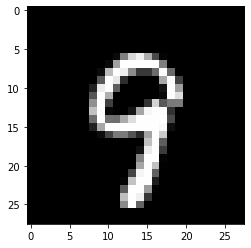

tensor(9)
torch.Size([64, 1, 28, 28]) torch.Size([64])


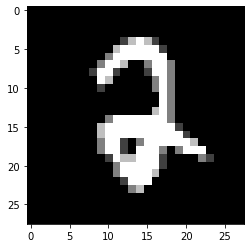

tensor(2)
torch.Size([64, 1, 28, 28]) torch.Size([64])


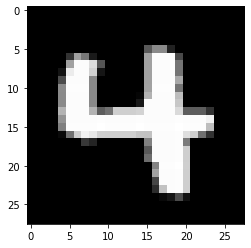

tensor(4)
torch.Size([64, 1, 28, 28]) torch.Size([64])


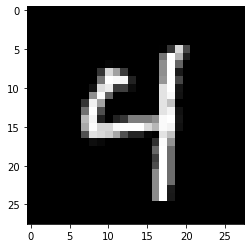

tensor(4)
torch.Size([64, 1, 28, 28]) torch.Size([64])


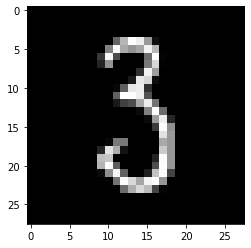

tensor(3)
torch.Size([64, 1, 28, 28]) torch.Size([64])


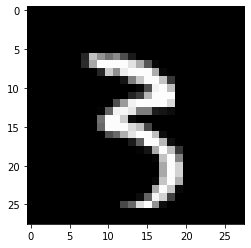

tensor(3)
torch.Size([64, 1, 28, 28]) torch.Size([64])


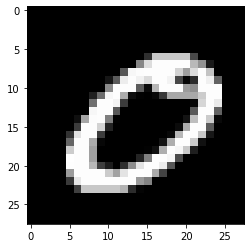

tensor(0)
torch.Size([64, 1, 28, 28]) torch.Size([64])


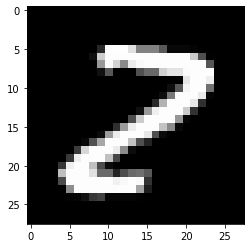

tensor(2)
torch.Size([64, 1, 28, 28]) torch.Size([64])


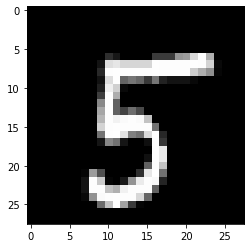

tensor(5)
torch.Size([64, 1, 28, 28]) torch.Size([64])


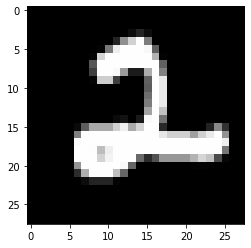

tensor(2)
torch.Size([64, 1, 28, 28]) torch.Size([64])


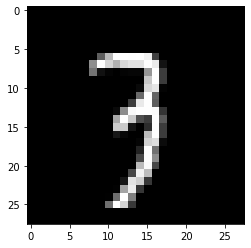

tensor(3)
torch.Size([64, 1, 28, 28]) torch.Size([64])


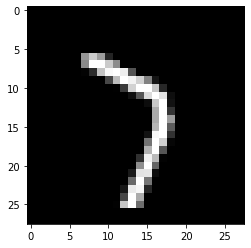

tensor(7)


In [5]:
for i, (images, labels) in enumerate(train_dataloader):
    print(images.shape, labels.shape)

    plt.imshow(images[0][0], cmap='gray')
    plt.show()

    print(labels[0])
    
    if i > 10:
        break

### 构建网络

In [6]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        logits = self.linear(x)
        return logits


In [7]:
input_size = 28*28
output_size = 10
model = Model(input_size, output_size)

### 损失函数和优化器

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### 模型评估

In [9]:
def evaluate(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in data_loader:
            x = x.view(-1, input_size)
            logits = model(x)
            _, predicted = torch.max(logits.data, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
    return correct / total

### 模型训练

In [10]:
for epoch in range(10):
    model.train()
    for images, labels in train_dataloader:
        # 将图像和标签转换成张量
        images = images.view(-1, 28*28)
        labels = labels.long()
        
        # 前向传播
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    accuracy = evaluate(model, test_dataloader)
    print(f'Epoch {epoch+1}: test accuracy = {accuracy:.2f}')

Epoch 1: test accuracy = 0.87
Epoch 2: test accuracy = 0.88
Epoch 3: test accuracy = 0.89
Epoch 4: test accuracy = 0.90
Epoch 5: test accuracy = 0.90
Epoch 6: test accuracy = 0.90
Epoch 7: test accuracy = 0.90
Epoch 8: test accuracy = 0.91
Epoch 9: test accuracy = 0.91
Epoch 10: test accuracy = 0.91
